## Question 1
#### Introduction


In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')

mean_age_by_occupation = users.groupby('occupation')['age'].mean()

display(mean_age_by_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [18]:
male_ratio_by_occupation = users[users['gender'] == 'M'].groupby('occupation').size() / users.groupby('occupation').size()
male_ratio_by_occupation = male_ratio_by_occupation.sort_values(ascending=False)

display(male_ratio_by_occupation)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [20]:
min_age_by_occupation = users.groupby('occupation')['age'].min()
max_age_by_occupation = users.groupby('occupation')['age'].max()

result = pd.concat([min_age_by_occupation, max_age_by_occupation], axis=1)
result.columns = ['Min Age', 'Max Age']

display(result)

,Min Age,Max Age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [21]:
mean_age_by_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()

display(mean_age_by_occupation_sex)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [22]:
gender_percentage_by_occupation = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
gender_percentage_by_occupation['total'] = gender_percentage_by_occupation['F'] + gender_percentage_by_occupation['M']
gender_percentage_by_occupation['percentage_female'] = (gender_percentage_by_occupation['F'] / gender_percentage_by_occupation['total']) * 100
gender_percentage_by_occupation['percentage_male'] = (gender_percentage_by_occupation['M'] / gender_percentage_by_occupation['total']) * 100

display(gender_percentage_by_occupation)

gender,F,M,total,percentage_female,percentage_male
occupation,,,,,
administrator,36,43,79,45.569620,54.430380
artist,13,15,28,46.428571,53.571429
doctor,0,7,7,0.000000,100.000000
educator,26,69,95,27.368421,72.631579
engineer,2,65,67,2.985075,97.014925
entertainment,2,16,18,11.111111,88.888889
executive,3,29,32,9.375000,90.625000
healthcare,11,5,16,68.750000,31.250000
homemaker,6,1,7,85.714286,14.285714


## Question 2
#### Euro Teams


In [29]:
import pandas as pd

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

goals_column = euro12['Goals']
display(goals_column)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [30]:
num_teams = euro12['Team'].nunique()
display(num_teams)

16

In [31]:
num_columns = euro12.shape[1]
display(num_columns)

35

In [32]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
display(discipline)

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [34]:
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
display(discipline_sorted)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [35]:
mean_yellow_cards_per_team = euro12['Yellow Cards'].mean()
display(mean_yellow_cards_per_team)

7.4375

In [36]:
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
display(teams_more_than_6_goals)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [37]:
teams_start_with_G = euro12[euro12['Team'].str.startswith('G')]
display(teams_start_with_G)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [38]:
first_7_columns = euro12.iloc[:, :7]
display(first_7_columns)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [39]:
all_columns_except_last_3 = euro12.iloc[:, :-3]
display(all_columns_except_last_3)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [40]:
shooting_accuracy_eng_ita_rus = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
display(shooting_accuracy_eng_ita_rus)

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3
#### Housing


In [59]:
import pandas as pd
import numpy as np

np.random.seed(42)
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

housing = pd.concat([series1, series2, series3], axis=1)
display(housing)

housing.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
display(housing.columns)

,0,1,2
0,3,3,23931
1,4,2,13627
2,1,2,26157
3,3,2,20173
4,3,2,28047
...,...,...,...
95,2,1,11154
96,2,2,14499
97,4,1,16295
98,2,1,22183


Index(['bedrs', 'bathrs', 'price_sqr_meter'], dtype='object')

In [60]:
bigcolumn = pd.concat([series1, series2, series3], axis=0, ignore_index=True)
bigcolumn = pd.DataFrame(bigcolumn, columns=['bigcolumn'])
print(bigcolumn.index.max()) 

299


In [61]:
housing.reset_index(drop=True, inplace=True)
bigcolumn.reset_index(drop=True, inplace=True)

print("Housing DataFrame:")
display(housing)

Housing DataFrame:


,bedrs,bathrs,price_sqr_meter
0,3,3,23931
1,4,2,13627
2,1,2,26157
3,3,2,20173
4,3,2,28047
...,...,...,...
95,2,1,11154
96,2,2,14499
97,4,1,16295
98,2,1,22183


In [62]:
print("Bigcolumn DataFrame:")
display(bigcolumn)

Bigcolumn DataFrame:


,bigcolumn
0,3
1,4
2,1
3,3
4,3
...,...
295,11154
296,14499
297,16295
298,22183


## Question 4
#### Wind Statistics


In [8]:
import pandas as pd


data = pd.read_table("wind.txt", sep="\s+")

# Combine 'Yr', 'Mo', and 'Dy' columns into a single 'Date' column
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), dayfirst=True)

# Set 'Date' as the index and drop the separate date columns
data.set_index('Date', inplace=True)
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)

print(data.head())

              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
Date                                                                       
2061-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
2061-02-01  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2061-03-01  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
2061-04-01  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
2061-05-01  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

              CLO    BEL    MAL  
Date                             
2061-01-01  12.58  18.50  15.04  
2061-02-01   9.67  17.54  13.83  
2061-03-01   7.67  12.75  12.71  
2061-04-01   5.88   5.46  10.88  
2061-05-01  10.34  12.92  11.83  


In [9]:
def fix_year(year):
    if year >= 2000:
        return year - 100
    else:
        return year

data['Yr'] = data.index.year
data['Yr'] = data['Yr'].apply(fix_year)
data.drop(['Yr'], axis=1, inplace=True)

In [10]:
data.index = pd.to_datetime(data.index)

In [11]:
missing_values_per_location = data.isnull().sum()

print("Missing values for each location:")
display(missing_values_per_location)

Missing values for each location:


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [12]:
total_non_missing_values = data.notnull().sum().sum()


print("Total non-missing values:", total_non_missing_values)

Total non-missing values: 78857


In [13]:
mean_windspeed = data.mean().mean()

print("Mean windspeed over all locations and times:", mean_windspeed)

Mean windspeed over all locations and times: 10.227982360836938


In [14]:
loc_stats = pd.DataFrame({
    'min_windspeed': data.min(),
    'max_windspeed': data.max(),
    'mean_windspeed': data.mean(),
    'std_windspeed': data.std()
})

print("loc_stats (min, max, mean, std):",loc_stats)

loc_stats (min, max, mean, std):      min_windspeed  max_windspeed  mean_windspeed  std_windspeed
RPT           0.67          35.80       12.362987       5.618413
VAL           0.21          33.37       10.644314       5.267356
ROS           1.50          33.84       11.660526       5.008450
KIL           0.00          28.46        6.306468       3.605811
SHA           0.13          37.54       10.455834       4.936125
BIR           0.00          26.16        7.092254       3.968683
DUB           0.00          30.37        9.797343       4.977555
CLA           0.00          31.08        8.495053       4.499449
MUL           0.00          25.88        8.493590       4.166872
CLO           0.04          28.21        8.707332       4.503954
BEL           0.13          42.38       13.121007       5.835037
MAL           0.67          42.54       15.599079       6.699794


In [15]:
day_stats = pd.DataFrame({
    'min_windspeed': data.min(axis=1),
    'max_windspeed': data.max(axis=1),
    'mean_windspeed': data.mean(axis=1),
    'std_windspeed': data.std(axis=1)
})

print("day_stats (min, max, mean, std):",day_stats)

day_stats (min, max, mean, std):             min_windspeed  max_windspeed  mean_windspeed  std_windspeed
Date                                                                   
2061-01-01           9.29          18.50       13.018182       2.808875
2061-02-01           6.50          17.54       11.336364       3.188994
2061-03-01           6.17          18.50       11.641818       3.681912
2061-04-01           1.79          11.75        6.619167       3.198126
2061-05-01           6.17          13.33       10.630000       2.445356
...                   ...            ...             ...            ...
1978-12-27           8.08          40.08       16.708333       7.868076
1978-12-28           5.00          41.46       15.150000       9.687857
1978-12-29           8.71          29.58       14.890000       5.756836
1978-12-30           9.13          28.79       15.367500       5.540437
1978-12-31           9.59          27.29       15.402500       5.702483

[6574 rows x 4 columns]


In [16]:
january_data = data[data.index.month == 1]
average_windspeed_january = january_data.mean()

print("Average windspeed in January for each location:")
display(average_windspeed_january)

Average windspeed in January for each location:


RPT    14.271257
VAL    12.466219
ROS    12.803961
KIL     7.082599
SHA    11.548507
BIR     7.944803
DUB    11.265000
CLA     9.425699
MUL     9.356679
CLO     9.782025
BEL    14.277885
MAL    17.290467
dtype: float64

In [17]:
yearly_data = data.resample('Y').mean()

print("Data Downsampled to Yearly:")
display(yearly_data)

Data Downsampled to Yearly:


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1973-12-31,11.828466,10.680493,10.680493,5.547863,9.640877,6.548740,8.482110,7.614274,8.245534,7.812411,12.169699,15.441096
1974-12-31,13.643096,11.811781,12.336356,6.427041,11.110986,6.809781,10.084603,9.896986,9.331753,8.736356,13.252959,16.947671
1975-12-31,12.008575,10.293836,11.564712,5.269096,9.190082,5.668521,8.562603,7.843836,8.797945,7.382822,12.631671,15.307863
1976-12-31,11.737842,10.203115,10.761230,5.109426,8.846339,6.311038,9.149126,7.146202,8.883716,7.883087,12.332377,15.471448
1977-12-31,13.099616,11.144493,12.627836,6.073945,10.003836,8.586438,11.523205,8.378384,9.098192,8.821616,13.459068,16.590849
...,...,...,...,...,...,...,...,...,...,...,...,...
2068-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
2069-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904
2070-12-31,12.600329,10.726932,11.730247,6.217178,10.567370,7.609452,9.609890,8.334630,9.297616,8.289808,13.183644,16.456027


In [18]:
data_monthly = data.resample('M').mean()

print("Data Downsampled to Monthly:")
display(data_monthly)

Data Downsampled to Monthly:


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1973-01-31,13.870968,12.398710,11.202903,6.023226,10.350000,8.051613,11.407097,8.511613,9.487742,8.765161,13.369677,16.665806
1973-02-28,12.978929,11.924286,10.284286,5.915000,10.692143,6.724643,8.915000,7.756786,8.946786,7.470714,12.551786,15.726429
1973-03-31,11.746129,10.862581,11.305484,6.009355,9.287097,6.491613,8.397419,7.973548,8.214839,7.710968,12.407097,15.071935
1973-04-30,11.298667,9.982667,12.353333,6.154667,8.729667,6.679667,9.129667,7.557333,8.188667,8.441667,11.277000,14.599333
1973-05-31,10.215161,9.910968,9.638710,5.151613,9.037419,6.829677,7.594194,7.697419,8.448065,7.685161,11.280000,15.148710
...,...,...,...,...,...,...,...,...,...,...,...,...
2072-08-31,9.724516,6.801613,10.352903,4.212258,6.488065,4.396774,8.188387,5.047097,6.863871,5.700645,8.765161,12.750968
2072-09-30,11.196333,9.803333,10.079000,4.461667,7.146000,4.925667,7.669000,6.848333,6.662667,5.860333,11.478667,12.926667
2072-10-31,12.372581,11.103226,12.524194,6.265806,9.500323,6.509355,10.863871,8.851290,9.106774,7.943226,14.115806,16.803871


In [19]:
data_weekly = data.resample('W').mean()

print("Data Downsampled to Weekly:")
display(data_weekly)

Data Downsampled to Weekly:


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1973-01-07,15.440000,12.340000,11.708571,6.970000,10.160000,8.541429,10.998571,7.740000,9.988571,9.315714,12.482857,14.012857
1973-01-14,13.184286,11.281429,12.367143,5.494286,9.974286,7.578571,8.645714,7.422857,7.571429,7.468571,10.788571,15.581429
1973-01-21,13.108571,11.118571,11.511429,6.454286,10.124286,7.864286,13.940000,7.905714,10.052857,9.957143,13.774286,21.265714
1973-01-28,13.880000,13.828571,10.168571,5.308571,11.178571,8.381429,11.878571,10.457143,10.207143,8.052857,15.477143,16.310000
1973-02-04,15.345714,14.225714,11.975714,7.360000,11.135714,8.355714,12.160000,10.352857,10.101429,10.142857,15.155714,16.194286
...,...,...,...,...,...,...,...,...,...,...,...,...
2072-12-04,15.214286,13.570000,14.231429,7.355714,11.524286,8.571429,13.970000,8.994286,10.607143,9.661429,14.952857,18.685714
2072-12-11,12.875714,10.964286,10.428571,5.521429,8.554286,5.827143,8.505714,7.867143,8.065714,7.528571,12.120000,15.611429
2072-12-18,17.917143,19.572857,16.711429,10.804286,14.940000,12.778571,15.614286,14.367143,12.125714,11.751429,20.471429,23.408571


In [20]:
weekly_stats_first_52_weeks = data_weekly.head(52).agg(['min', 'max', 'mean', 'std'])

print("Data Weekly for the First 52 Weeks:")
display(weekly_stats_first_52_weeks)

Data Weekly for the First 52 Weeks:


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,4.501429,5.268571,6.374286,2.601429,5.142857,1.968571,3.650000,3.072857,3.774286,3.438571,5.150000,7.341429
max,19.005714,16.821429,14.607143,10.082857,17.357143,11.082857,16.701429,13.698571,14.041429,15.071429,18.445714,27.475714
mean,11.831648,10.682253,10.690962,5.559093,9.648242,6.550934,8.494890,7.618132,8.255137,7.817033,12.167995,15.440137
std,2.646834,2.354444,2.001836,1.458108,2.099693,1.758310,2.527531,1.992826,1.934880,2.045367,2.621703,3.564371


#### Question 5


In [74]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [75]:
num_observations = chipo.shape[0]
print("Number of observations in the dataset:", num_observations)

Number of observations in the dataset: 4622


In [76]:
num_columns = chipo.shape[1]
print("Number of columns in the dataset:", num_columns)

Number of columns in the dataset: 5


In [77]:
print("Column names:")
print(chipo.columns)

Column names:
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [78]:
print("The dataset is indexed from 0 to", chipo.index.max())

The dataset is indexed from 0 to 4621


In [79]:
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item:", most_ordered_item)

Most-ordered item: Chicken Bowl


In [80]:
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Number of", most_ordered_item, "ordered:", most_ordered_item_count)

Number of Chicken Bowl ordered: 761


In [81]:
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("Most-ordered choice_description:", most_ordered_choice)

Most-ordered choice_description: [Diet Coke]


In [82]:
total_items_ordered = chipo['quantity'].sum()
print("Total number of items ordered:", total_items_ordered)

Total number of items ordered: 4972


In [88]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]) if isinstance(x, str) else x)
print("Data type of item_price after converting to float:", chipo['item_price'].dtype)

Data type of item_price after converting to float: float64


In [89]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue for the period:", revenue)

Total revenue for the period: 39237.02


In [90]:
num_orders = chipo['order_id'].nunique()
print("Number of orders made in the period:", num_orders)

Number of orders made in the period: 1834


In [91]:
average_revenue_per_order = revenue / num_orders
print("Average revenue amount per order:", average_revenue_per_order)

Average revenue amount per order: 21.39423118865867


In [92]:
num_different_items = chipo['item_name'].nunique()
print("Number of different items sold:", num_different_items)

Number of different items sold: 50


## Question 6


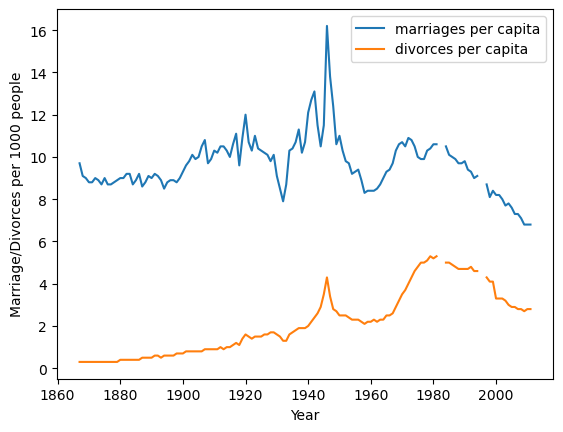

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

marriages_per_capita = data['Marriages_per_1000']
divorces_per_capita = data['Divorces_per_1000']

columns = marriages_per_capita, divorces_per_capita
years = data['Year']
ind = ["marriages per capita", "divorces per capita"]


x_data = range(1867, 1867 + data.shape[0])


fig, axis = plt.subplots()


# plot each column

for i in range(len(columns)):
    axis.plot(x_data, columns[i], label=ind[i])

    
axis.set_xlabel('Year')
axis.set_ylabel('Marriage/Divorces per 1000 people')
axis.legend()

## Question 7


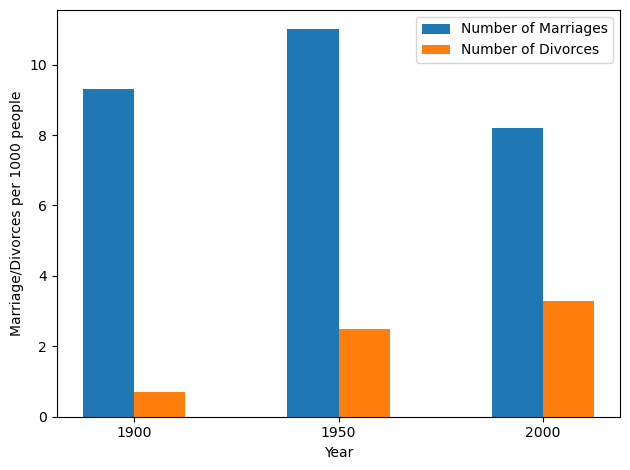

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

marriages = data['Marriages_per_1000']
divorces = data['Divorces_per_1000']

years = [1900, 1950, 2000]
indicators = ["marriages per capita", "divorces per capita"]

# Filter the data for the desired years using pandas.concat
filtered_data = pd.concat([data[data['Year'] == year] for year in years], ignore_index=True)

marriages_filtered = filtered_data['Marriages_per_1000']
divorces_filtered = filtered_data['Divorces_per_1000']

fig, p = plt.subplots()
bar_width = 0.25
X = np.arange(len(years))

p1 = plt.bar(X, marriages_filtered, bar_width, label="Number of Marriages")
p2 = plt.bar(X + bar_width, divorces_filtered, bar_width, label="Number of Divorces")

plt.xlabel('Year')
plt.ylabel('Marriage/Divorces per 1000 people')
plt.xticks(X + (bar_width/2), years)
plt.legend()
plt.tight_layout()

plt.show()


## Question 8 


Text(0, 0.5, 'Total no of kills')

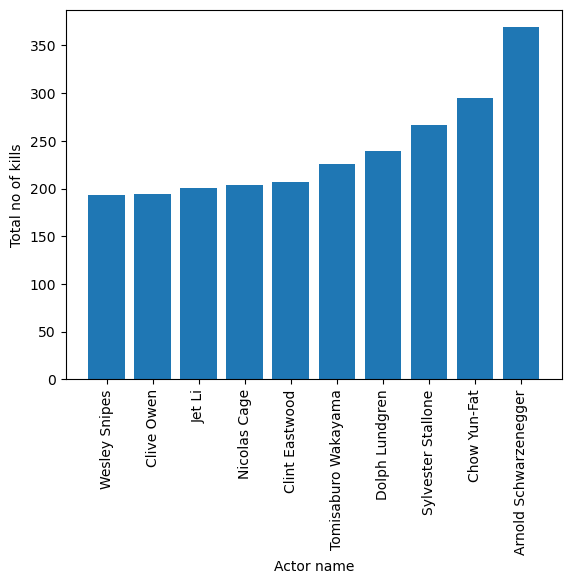

In [3]:
actor_kills_data = pd.read_csv('actor_kill_counts.csv')
kills = actor_kills_data.sort_values(by=['Count'])


actor_names = kills['Actor'].values
kill_counts = kills['Count'].values


plt.bar(actor_names, kill_counts, label=actor_names)
plt.xticks(rotation='vertical')
plt.xlabel("Actor name")
plt.ylabel("Total no of kills")

## Question 9


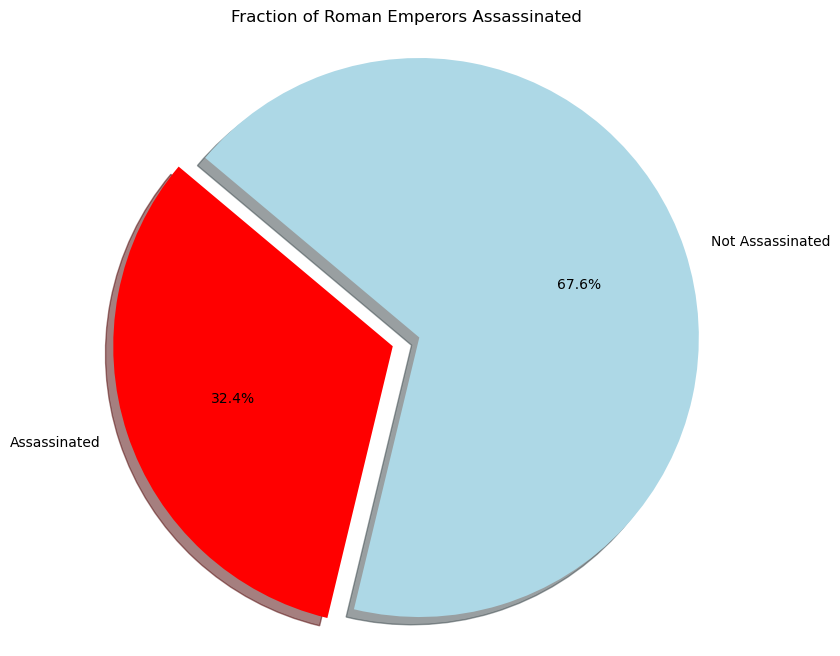

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('roman-emperor-reigns.csv')

assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]

total_emperors = data.shape[0]
not_assassinated_emperors = total_emperors - assassinated_emperors

labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_emperors, not_assassinated_emperors]
colors = ['red', 'lightblue']
explode = (0.1, 0) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Fraction of Roman Emperors Assassinated')

plt.show()

## Question 10


Text(0, 0.5, 'Computer Science Doctorates Awarded (US)')

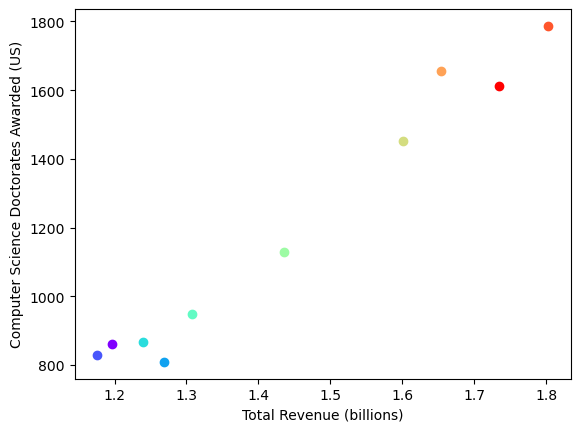

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline


arcade_revenue_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_revenue = arcade_revenue_data['Total Arcade Revenue (billions)'].values
cs_doctorates = arcade_revenue_data['Computer Science Doctorates Awarded (US)'].values


fig, p = plt.subplots()

colors = cm.rainbow(np.linspace(0, 1, len(arcade_revenue_data['Year'])))

for i in range(len(arcade_revenue_data['Year'])):
    p.scatter(arcade_revenue[i], cs_doctorates[i],color=colors[i])

p.set_xlabel('Total Revenue (billions)')
p.set_ylabel('Computer Science Doctorates Awarded (US)')